# เตรียมข้อมูล

In [85]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [86]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [87]:
orig_df = pd.read_excel("clust_data62.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,11490,79742.2,90596.1,279307,10396.7,471532.0
1,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327,40830.4
2,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6
3,กระทรวงการคลัง,12679.7,6433.3,3326.1,753,219755.9,242948.0
4,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3
5,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6
7,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9
8,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4


In [88]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327,40830.4
2,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6
3,กระทรวงการคลัง,12679.7,6433.3,3326.1,753,219755.9,242948.0
4,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3
5,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6
7,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9
8,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875,6189.6,11026.6,948.3,1653.1,30692.6


In [89]:
orig_df.to_csv(r'clustering_data62.csv', index = False, header=True)

# Kmean

In [90]:
df = pd.read_csv("clustering_data62.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,40830.4
1,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6
2,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,242948.0
3,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3
4,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6
6,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9
7,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,30692.6


<AxesSubplot:>

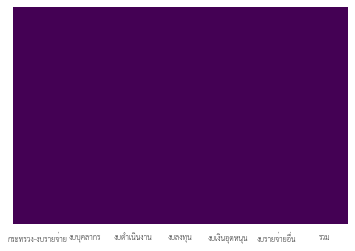

In [91]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,26828.04000,6830.595000,17987.605000,27964.615000,19092.180000,98703.035000
std,56913.87696,8298.320903,38660.804454,71378.934134,51645.449306,137833.858485
min,415.00000,324.500000,419.500000,34.300000,176.300000,2301.000000
25%,2003.77500,1057.425000,746.400000,727.475000,635.475000,7808.775000
50%,3772.10000,2770.200000,2875.950000,1591.250000,1648.100000,27918.250000
75%,14204.60000,10378.050000,12864.975000,7943.675000,4099.800000,146441.175000
max,237718.10000,28233.100000,166867.500000,278770.100000,219755.900000,487646.400000


In [93]:
ddf = df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
ddf.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2131.6,736.4,2628.9,1382.8,1235.6
16,415.0,324.5,781.1,12947.3,259.7
17,237718.1,28233.1,32548.7,179311.0,9835.5
18,95815.7,14808.5,17895.0,6653.7,215.8
19,1620.3,620.3,642.3,378.0,1970.3


จะไม่ตัด Outlier ออกเนื่องจากต้องการเทียบทุกกระทรวง

In [94]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(ddf)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.412334,-0.478227,-0.297626,-0.232150,-0.074798
1,1.203523,2.213682,-0.180440,-0.324660,1.453035
2,-0.255050,-0.049120,-0.389086,-0.391131,3.986346
3,-0.430426,-0.525802,-0.466221,-0.381698,-0.342736
4,-0.456412,-0.707128,-0.439097,-0.396644,-0.346640


In [95]:
df_normalized.describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000
mean,-4.996004e-17,7.216450e-17,-1.387779e-17,1.165734e-16,0.000000
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978
min,-4.761441e-01,-8.043932e-01,-4.662214e-01,-4.014616e-01,-0.375779
25%,-4.475035e-01,-7.137766e-01,-4.575462e-01,-3.914981e-01,-0.366657
50%,-4.156261e-01,-5.020145e-01,-4.010323e-01,-3.790825e-01,-0.346541
75%,-2.275610e-01,4.385962e-01,-1.359441e-01,-2.877747e-01,-0.297836
max,3.801685e+00,2.646139e+00,3.950967e+00,3.604999e+00,3.986346


C:\Users\PPUNN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

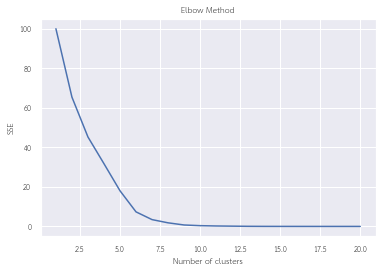

In [96]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

จากกราฟพบว่าค่า k วัดจากจุดที่เปลี่ยนแปลงความชันมากที่สุดอยู่ที่ประมาณ 6

In [97]:
k = 6

In [98]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [99]:
cluster_predictions = kmeans.predict(df_normalized)
ddf['cluster_id'] = cluster_predictions
ddf.tail(10)

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_22500/579068457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,788.6,528.1,641.0,34.3,309.0,0
11,2219.5,1609.1,453.2,650.9,1956.5,0
12,18779.3,14070.3,31700.4,278770.1,28481.6,2
13,9734.9,9147.3,3123.0,950.8,2187.9,0
14,3589.5,1565.1,461.2,46233.3,745.2,0
15,2131.6,736.4,2628.9,1382.8,1235.6,0
16,415.0,324.5,781.1,12947.3,259.7,0
17,237718.1,28233.1,32548.7,179311.0,9835.5,1
18,95815.7,14808.5,17895.0,6653.7,215.8,4
19,1620.3,620.3,642.3,378.0,1970.3,0


In [100]:
ddf.cluster_id.value_counts()

0    13
4     3
5     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

## silhouette_score

In [101]:
print(metrics.silhouette_score(ddf,kmeans.labels_))

0.5452640122061468


silhouette_score ยิ่งใกล้เคียง 1 ยิ่งแม่นยำ

## davies_bouldin_score

In [102]:
print(metrics.davies_bouldin_score(ddf,kmeans.labels_))

0.4713055103012136


davies_bouldin_score ยิ่งใกล้เคียง 0 ยิ่งแม่นยำ

## 6 Clusters

#### Cluster 0

In [103]:
ddf[ddf.cluster_id==0].mean()

งบบุคลากร        3366.553846
งบดําเนินงาน     2405.123077
งบลงทุน          2349.969231
งบเงินอุดหนุน    6569.369231
งบรายจ่ายอื่น    2274.661538
cluster_id          0.000000
dtype: float64

In [104]:
df[ddf.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,40830.4
3,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3
4,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,30692.6
10,กระทรวงพลังงาน,788.6,528.1,641.0,34.3,309.0,2301.0
11,กระทรวงพาณิชย์,2219.5,1609.1,453.2,650.9,1956.5,6889.2
13,กระทรวงยุติธรรม,9734.9,9147.3,3123.0,950.8,2187.9,25143.9
14,กระทรวงแรงงาน,3589.5,1565.1,461.2,46233.3,745.2,52594.3


#### Cluster 1

In [105]:
ddf[ddf.cluster_id==1].mean()

งบบุคลากร        237718.1
งบดําเนินงาน      28233.1
งบลงทุน           32548.7
งบเงินอุดหนุน    179311.0
งบรายจ่ายอื่น      9835.5
cluster_id            1.0
dtype: float64

In [106]:
df[ddf.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
17,กระทรวงศึกษาธิการ,237718.1,28233.1,32548.7,179311.0,9835.5,487646.4


#### Cluster 2

In [107]:
ddf[ddf.cluster_id==2].mean()

งบบุคลากร         18779.3
งบดําเนินงาน      14070.3
งบลงทุน           31700.4
งบเงินอุดหนุน    278770.1
งบรายจ่ายอื่น     28481.6
cluster_id            2.0
dtype: float64

In [108]:
df[ddf.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
12,กระทรวงมหาดไทย,18779.3,14070.3,31700.4,278770.1,28481.6,371801.7


#### Cluster 3

In [109]:
ddf[ddf.cluster_id==3].mean()

งบบุคลากร          9472.2
งบดําเนินงาน       2468.7
งบลงทุน          166867.5
งบเงินอุดหนุน        45.9
งบรายจ่ายอื่น       744.3
cluster_id            3.0
dtype: float64

In [110]:
df[ddf.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6


#### Cluster 4

In [111]:
ddf[ddf.cluster_id==4].mean()

งบบุคลากร        71382.100000
งบดําเนินงาน     18046.633333
งบลงทุน          31586.600000
งบเงินอุดหนุน     5003.500000
งบรายจ่ายอื่น    31151.900000
cluster_id           4.000000
dtype: float64

In [112]:
df[ddf.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6
6,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9
18,กระทรวงสาธารณสุข,95815.7,14808.5,17895.0,6653.7,215.8,135388.7


#### Cluster 5

In [113]:
ddf[ddf.cluster_id==5].mean()

งบบุคลากร         12679.7
งบดําเนินงาน       6433.3
งบลงทุน            3326.1
งบเงินอุดหนุน       753.0
งบรายจ่ายอื่น    219755.9
cluster_id            5.0
dtype: float64

In [114]:
df[ddf.cluster_id==5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,242948.0
